In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("housing.csv")


data.dropna(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [3]:
from sklearn.model_selection import train_test_split

x = data.drop(["median_house_value"], axis=1)
y = data['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

train_data = x_train.join(y_train)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20450,-118.91,34.28,6.0,6106.0,1134.0,3246.0,1062.0,5.2206,<1H OCEAN,280200.0
1729,-122.34,37.98,33.0,2014.0,410.0,1354.0,427.0,3.9773,NEAR BAY,131300.0
214,-122.22,37.79,49.0,1826.0,450.0,1201.0,424.0,2.5000,NEAR BAY,136700.0
11685,-118.01,33.88,19.0,1434.0,391.0,1088.0,341.0,3.3690,<1H OCEAN,269600.0
19551,-120.98,37.62,26.0,3819.0,955.0,3010.0,932.0,1.9206,INLAND,81300.0
...,...,...,...,...,...,...,...,...,...,...
10486,-117.68,33.48,15.0,1786.0,299.0,727.0,293.0,5.0527,<1H OCEAN,231400.0
1934,-121.02,38.66,4.0,7392.0,1155.0,3096.0,1065.0,4.5246,INLAND,198900.0
15932,-122.40,37.73,50.0,1947.0,411.0,1170.0,384.0,3.4769,NEAR BAY,238700.0
17038,-122.25,37.49,40.0,2709.0,521.0,1156.0,510.0,4.6366,NEAR OCEAN,395500.0


ValueError: could not convert string to float: '<1H OCEAN'

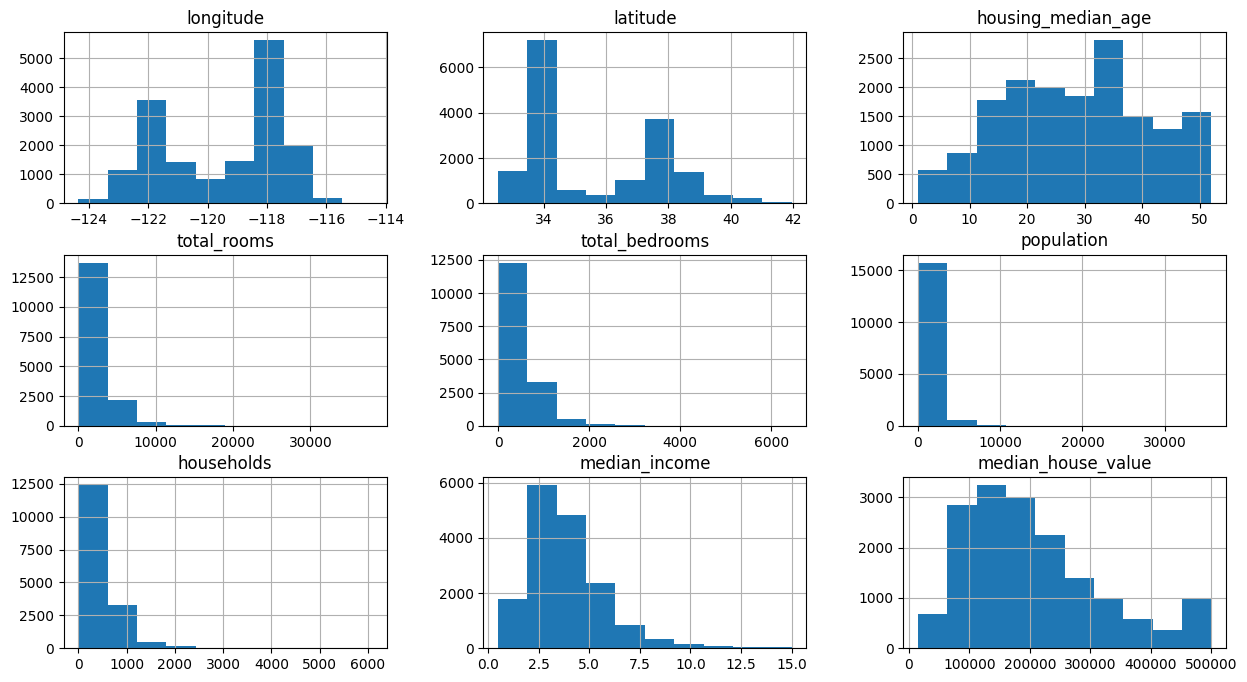

<Figure size 1500x800 with 0 Axes>

In [5]:
train_data.hist(figsize=(15, 8))

plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


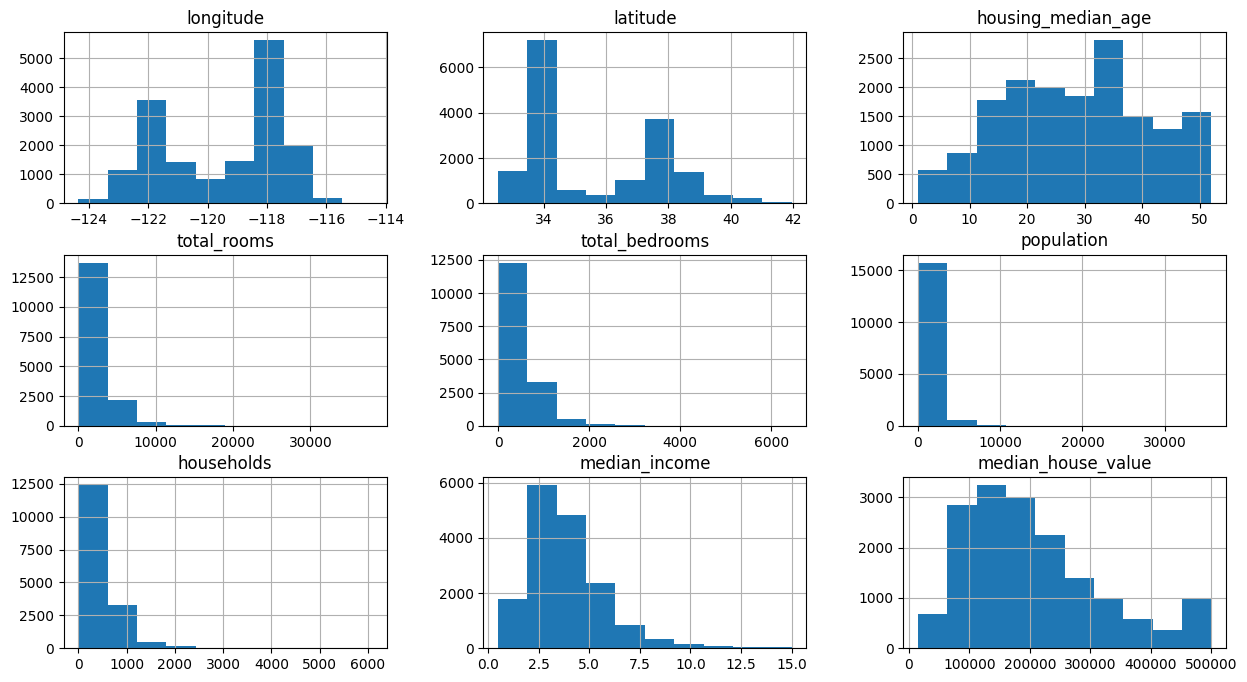

In [6]:
train_data.hist(figsize=(15, 8))

train_data.ocean_proximity.value_counts()

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

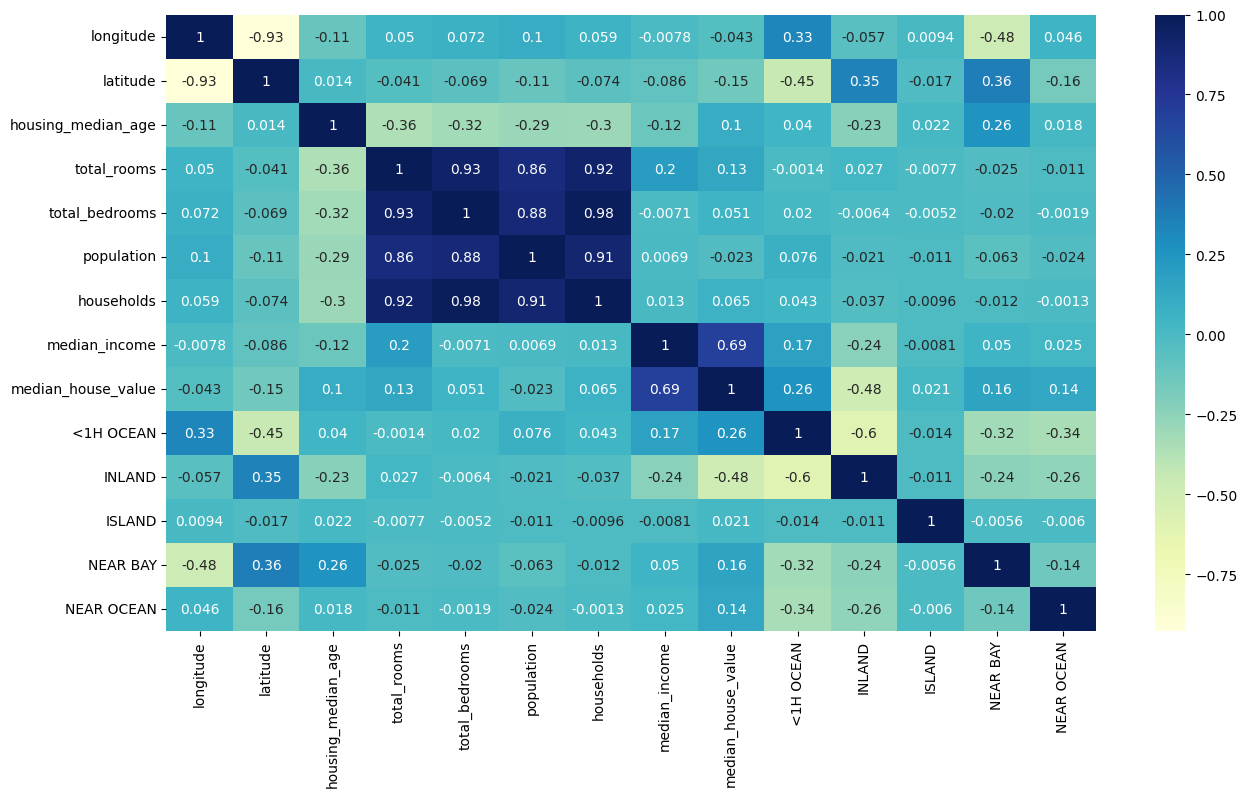

In [7]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

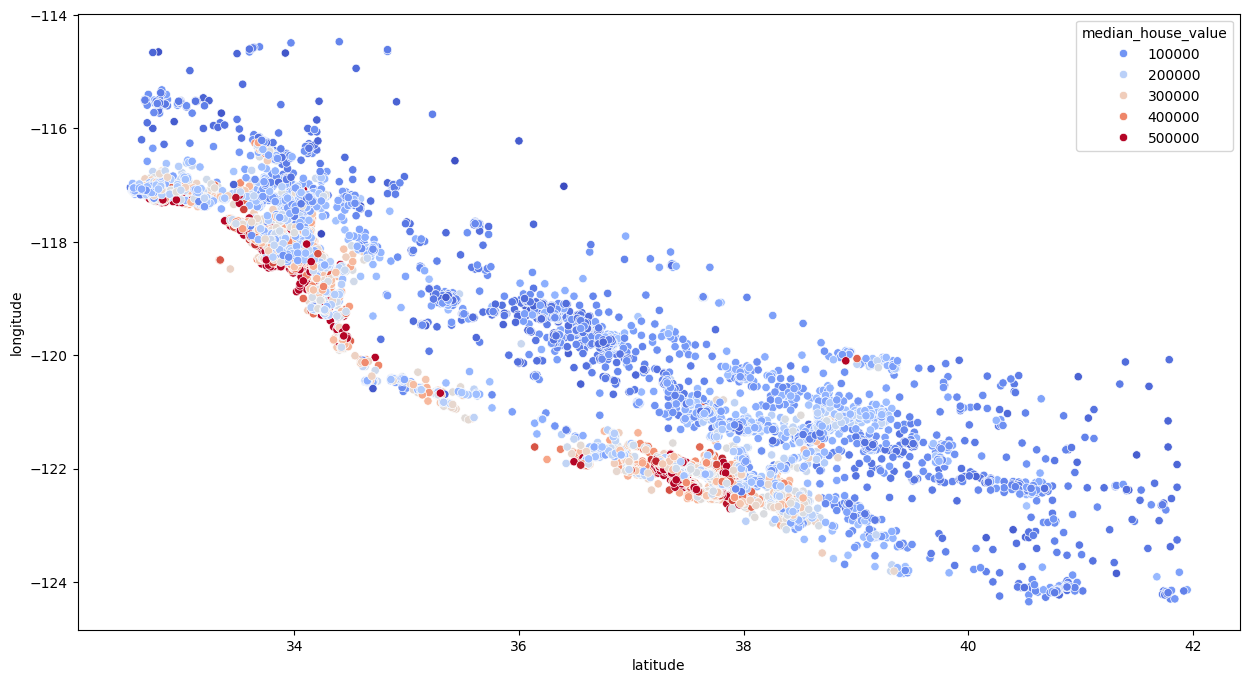

In [8]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [9]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<Axes: >

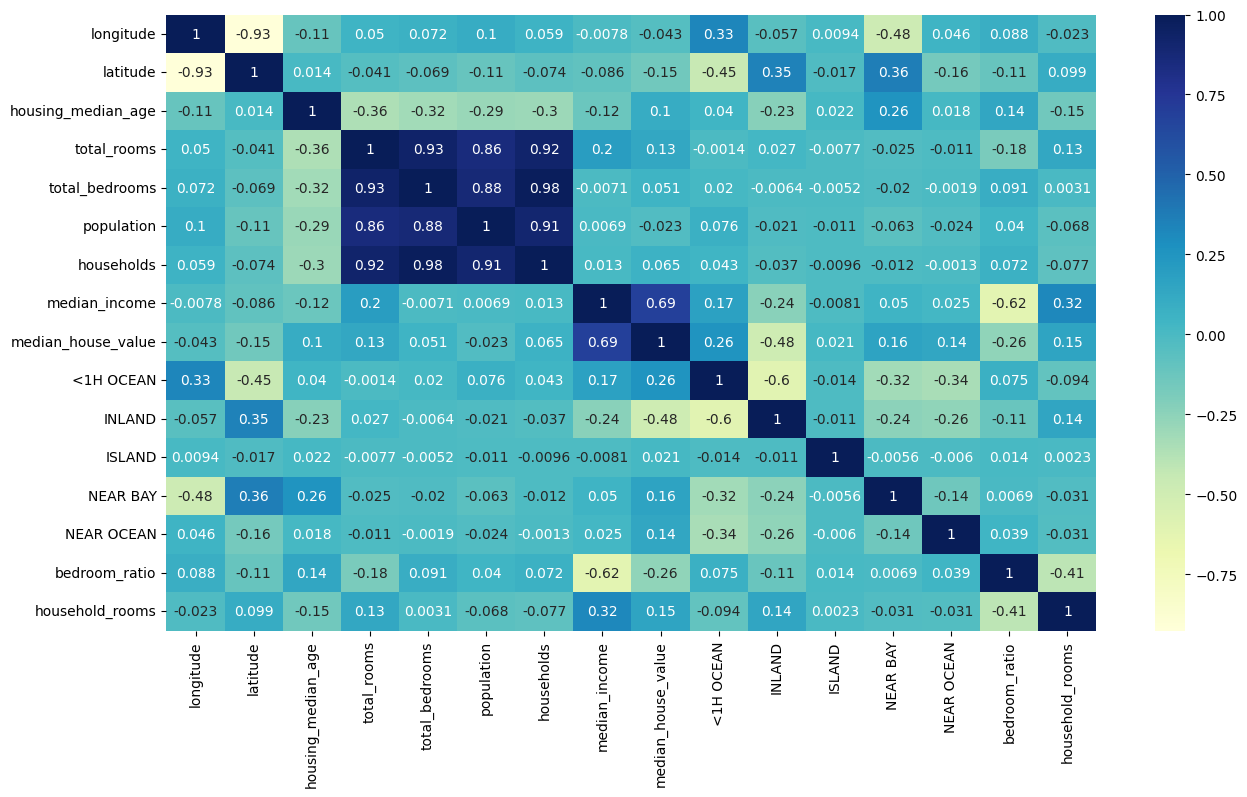

In [10]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [12]:
scalar = StandardScaler()

x_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]
x_train_s = scalar.fit_transform(x_train)

reg = LinearRegression()

In [13]:
reg.fit(x_train_s, y_train)

test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

In [14]:
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]

In [15]:
x_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

x_test_s = scalar

reg.score(x_test_s, y_test)

ValueError: Expected 2D array, got scalar array instead:
array=StandardScaler().
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [16]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()

In [17]:
forest.fit(x_train_s, y_train)

forest.score(x_test_s, y_test)

KeyboardInterrupt: 

In [18]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

In [19]:
param grid = {
    "n_estimators": [3, 10, 30]
    "max_features": [8, 12, 20]
    "min_samples_split": [2, 4, 6, 8]
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, 
                           scoring="neg_mean_squared_error"
                           return_train_score=True)

SyntaxError: invalid syntax (3042655786.py, line 1)

In [20]:
grid_search.fit(x_train_s, y_train)

best_forest = grid_search.best_estimator_

best_forest.score(x_test_s, y_test)


grid_search.best_estimator_.score(x_test_s, y_test)

NameError: name 'grid_search' is not defined